# Modelo SIR


- Suceptible ($\frac{dS}{dt} = - \frac{\beta  S  I}{N}$)
- Infectado  ($\frac{dI}{dt} = \frac{\beta  S  I}{N} - \gamma  I$)
- Recuperado ($\frac{dR}{dt} = - \gamma  I$) 

In [4]:
!pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/139.3 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.3 kB 960.0 kB/s eta 0:00:01
   -------------------------------------- - 133.1/139.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 139.3/139.3 kB 1.4 MB/s eta 0:00:00
   -------------------------

In [5]:
import ipywidgets as widgets
from ipywidgets import interact 
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline



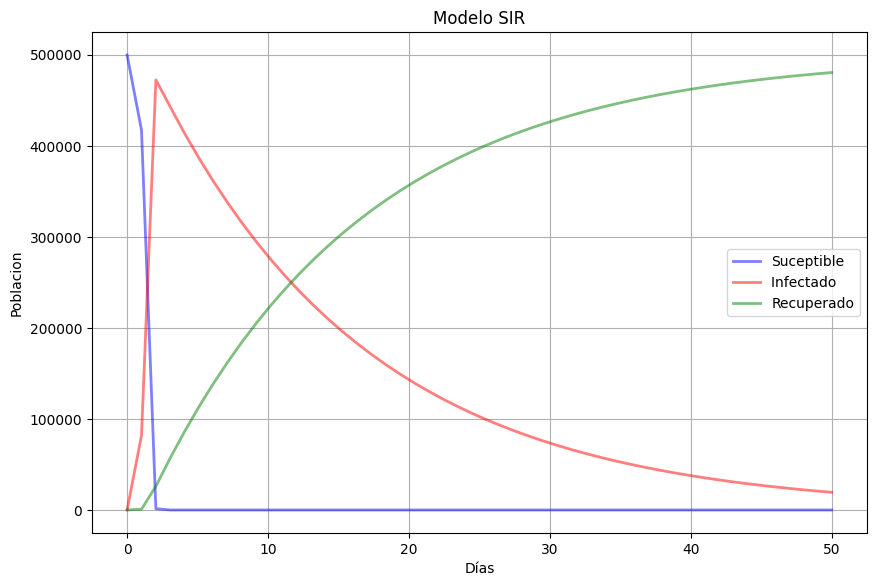

interactive(children=(IntSlider(value=500000, description='poblacion_total', max=1000000), IntSlider(value=50,…

In [6]:
def SuceptiblesIniciales(poblacion_total,VI_infectados,VI_recuperados):
    return poblacion_total - (VI_infectados + VI_recuperados)

def CalcularBeta(promedio_de_contactos,probabilidad_de_transmicion):
    return promedio_de_contactos*probabilidad_de_transmicion

def CalcularGamma(dias_de_recuperacion):
    return 1.0/dias_de_recuperacion

def deriv_suceptible(beta,suceptible,infectado,poblacion_total):
    return -beta * suceptible *infectado / poblacion_total

def deriv_infectado(beta,suceptible,infectado,poblacion_total,gamma):
    return beta * suceptible * infectado / poblacion_total - gamma*infectado

def deriv_recuperados(infectado,gamma):
    return gamma*infectado

def deriv_helper(VI,tiempo,poblacion_total,beta,gamma):
    suceptible,infectado,recuperado = VI

    dSdt = deriv_suceptible(beta, suceptible, infectado, poblacion_total)
    dIdt = deriv_infectado(beta, suceptible, infectado, poblacion_total, gamma)
    dRdt = deriv_recuperados(infectado, gamma)

    return dSdt, dIdt, dRdt
@interact(poblacion_total = (0,1000000),dias = (0,100),VI_infectados = (0,100),VI_recuperados = (0,100),promedio_de_contactos = (0,30),probabilidad_de_transmicion = (0.0,1.00),dias_de_recuperacion = (1,30))
def plot_sir(poblacion_total,dias,VI_infectados,VI_recuperados,promedio_de_contactos,probabilidad_de_transmicion,dias_de_recuperacion):
    #suceptibles iniciales
    VI_suceptibles = SuceptiblesIniciales(poblacion_total, VI_infectados, VI_recuperados)
    #beta 
    beta = CalcularBeta(promedio_de_contactos, probabilidad_de_transmicion)
    #gamma
    gamma = CalcularGamma(dias_de_recuperacion)
    #tiempo
    tiempo = np.linspace(0,dias,dias)
    #condiciones iniciales
    VI = (VI_suceptibles,VI_infectados,VI_recuperados)
    #integramos
    func_integ = odeint(deriv_helper, VI, tiempo, args = (poblacion_total,beta,gamma))
    suceptible,infectado,recuperado = func_integ.T
    
    fig = plt.figure(figsize = (10,6.5),facecolor = 'w')
    ax = fig.add_subplot(111,axisbelow=True)
    ax.plot(tiempo, suceptible, 'b', alpha=0.5,lw=2, label = "Suceptible")
    ax.plot(tiempo, infectado , 'r', alpha=0.5,lw=2, label = "Infectado ")
    ax.plot(tiempo, recuperado, 'g', alpha=0.5,lw=2, label = "Recuperado")

    ax.set_xlabel("Días")
    ax.set_ylabel("Poblacion")
    ax.set_title("Modelo SIR")
    legend = ax.legend()

    plt.grid()
    plt.show()